In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [199]:
pd.set_option('display.max_rows', 500)

In [3]:
# load all the data on the animes and users
with open('full_list_final.pickle', 'rb') as infile:
    final=pickle.load(infile)

infile.close()

In [4]:
# load the animes and their types
anime_types = pd.read_csv('anime_types.csv', index_col=0)

In [5]:
df = pd.DataFrame.from_dict(final)

In [6]:
# change the order of columns in df
df = df[['title', 'genres', 'user', 'ratings']]

In [7]:
# blank ratings mean user did NOT rate the anime
# replace all blank ratings with 0 as placeholder
df['ratings'] = df['ratings'].replace('', value = 0)

In [8]:
# make ratings floats instead of strings
df['ratings'] = df['ratings'].astype('float64')

In [9]:
# RUN THIS ONLY ONCE!!

# change ratings scale from 1-5 to 1-10
df.ratings = df.ratings*2

In [10]:
# make updated ratings into ints
df['ratings'] = df['ratings'].astype('int64')

In [11]:
# merge anime types with rest of the anime data
df = df.merge(anime_types, on='title')

In [12]:
# get rid of anime music videos
df = df[df.type != 'Video']

In [13]:
# get only users that rated something (not 0 ratings)
only_rated_users = df[df.ratings > 0]

In [202]:
all_genres = set([l[i].strip().strip('\n') for l in only_rated_users.genres for i in range(len(l))])
all_genres_df = pd.DataFrame(all_genres)
all_genres_df.columns = ['Genre']
all_genres_df = all_genres_df.sort_values(by='Genre').reset_index().drop('index',axis=1)

In [203]:
all_genres_df

,Genre
0,15th Century
1,16th Century
2,17th Century
3,18th Century
4,19th Century
5,Abstract
6,Acting
7,Action
8,Adult Couples
9,Adult Industry


In [14]:
# get how many times each anime got rated
num_of_ratings = only_rated_users.groupby('title').count()[['ratings']].sort_values(by='ratings')

In [15]:
num_of_ratings.tail()

,ratings
title,
Shouwa Genroku Rakugo Shinjuu,167
Terra Formars,167
Descending Stories: Shouwa Genroku Rakugo Shinjuu,168
Kokkoku: Moment by Moment,169
Death Note,175


In [16]:
# get the ratings and the count of how many time the rating appears
ratings_count = only_rated_users['ratings'].value_counts().sort_values()

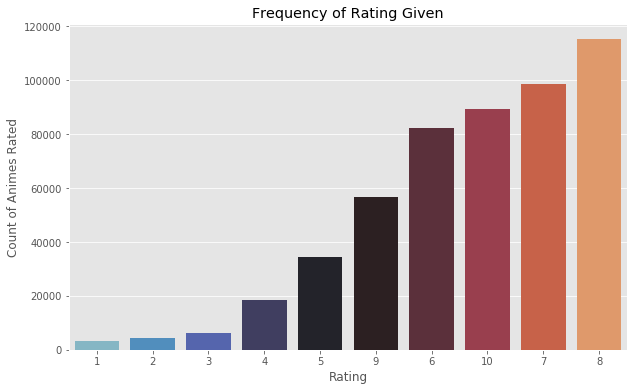

In [70]:
# graph which rating appears most
plt.style.use('ggplot')

plt.figure(figsize=(10,6))
ax = sns.barplot(ratings_count.index, ratings_count.values, palette='icefire', order=ratings_count.index)
ax.set_xlabel('Rating')
ax.set_ylabel('Count of Animes Rated')
ax.set_title('Frequency of Rating Given')
plt.savefig('freq_rating.png')
plt.show()

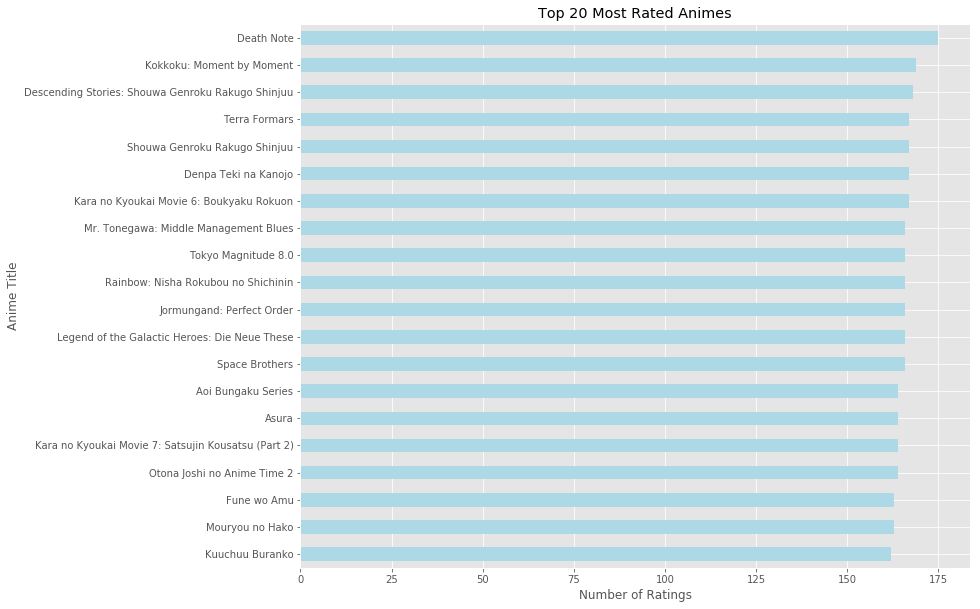

In [71]:
# graph Top 20 Most Rated Animes
ax1 = num_of_ratings[-20:].plot(kind='barh', figsize=(12,10), color='lightblue')
ax1.set_xlabel('Number of Ratings')
ax1.set_ylabel('Anime Title')
ax1.set_title('Top 20 Most Rated Animes')
ax1.legend().remove()
plt.savefig('top20_most_rated.png')
plt.show()

In [19]:
# get the counts of each type of anime thats in the data
count_types = only_rated_users.groupby('type').count()[['title']].sort_values(by='title')

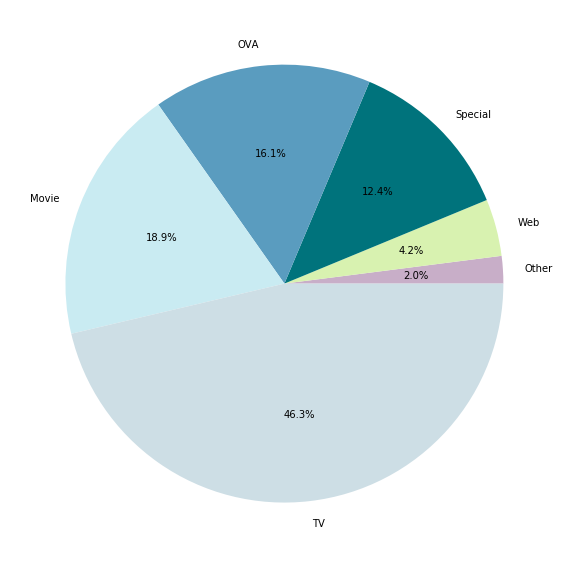

In [156]:
# graph how many of each type of anime is in the data
plt.figure(figsize=(8,8))
plt.pie(labels=count_types.index, x=count_types.title, autopct='%1.1f%%', colors=['#C8AEC8','#D8F2B0','#00737C','#5A9CBF','#C9EBF2','#CDDEE5'])

plt.tight_layout()
# plt.savefig('type_count.png')
plt.show()

In [21]:
# get only users that rated at least 5 animes
rated_5 = only_rated_users.groupby('user').filter(lambda x: len(x) >= 5)

In [102]:
rated_shows = rated_5[rated_5.type.isin(['TV','Web'])]

In [103]:
# get the average of each anime's ratings
avg_anime_ratings = rated_shows.groupby('title').mean().sort_values(by='ratings')

In [104]:
avg_anime_ratings.tail(20)

,ratings
title,
Assassination Classroom TV 2nd Season,8.915966
Mob Psycho 100,8.915966
Natsume's Book of Friends Season 6,8.920354
Gintama,8.923077
Clannad After Story,8.924370
Gintama',8.926471
Descending Stories: Shouwa Genroku Rakugo Shinjuu,8.949367
Monster,8.968153
Code Geass: Lelouch of the Rebellion,8.968992


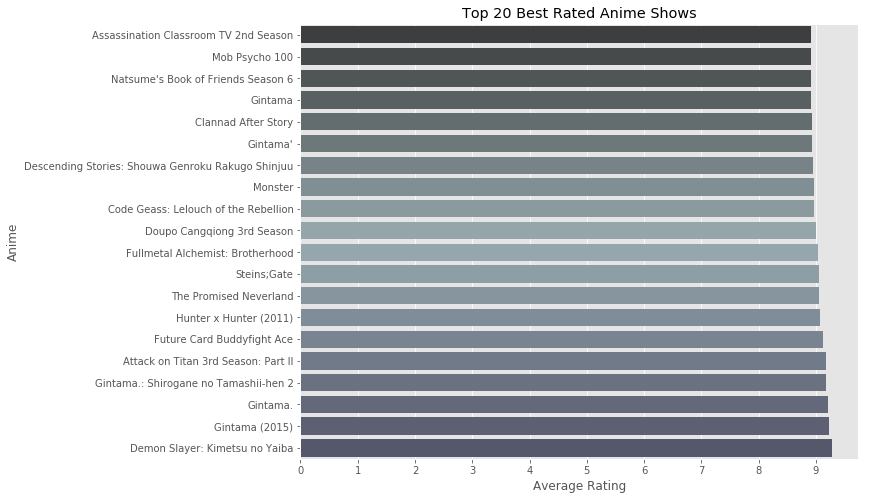

In [122]:
plt.figure(figsize=(10,8))
ax3 = sns.barplot(avg_anime_ratings.tail(20).ratings, avg_anime_ratings.tail(20).index, palette='bone_d')
ax3.set_xlabel('Average Rating')
ax3.set_ylabel('Anime')
ax3.set_title('Top 20 Best Rated Anime Shows')
ax3.set_xticks(range(10))
# plt.savefig('top20_best.png')
plt.show()

In [60]:
avg_user_ratings_given = rated_5.groupby('user').agg({'user': 'count', 'ratings': 'mean'})
avg_user_ratings_given.columns=['user_count','avg_rating']
avg_user_ratings_given = avg_user_ratings_given.reset_index()
avg_user_ratings_given.head()

,user,user_count,avg_rating
0,000000000000L,70,8.885714
1,0000Dragonfly0000,88,8.204545
2,001heeroyuy,8,7.500000
3,004,328,6.539634
4,0063gam,94,8.276596


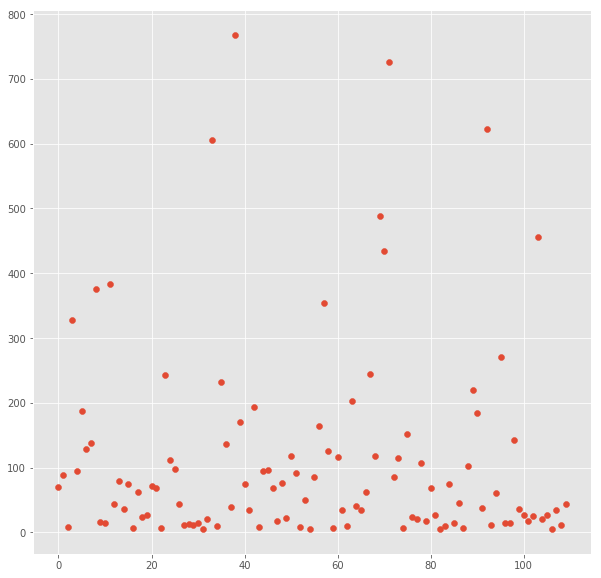

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(avg_user_ratings_given.index[:110], avg_user_ratings_given.user_count[:110])